# **1. Import Library**

In [379]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [380]:
url = "https://raw.githubusercontent.com/Meio047/Project-Machine-Learning-Pemula/refs/heads/main/Dataset_inisiasi.csv"
df = pd.read_csv(url)
df.head()

,TransactionAmount,TransactionType,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,CustomerOccupation,Location,Channel,TransactionDate,PreviousTransactionDate,Label
0,14.09,Debit,70,81,1,5112.21,Doctor,San Diego,ATM,2023-04-11 16:29:14,2024-11-04 08:08:08,0
1,376.24,Debit,68,141,1,13758.91,Doctor,Houston,ATM,2023-06-27 16:44:19,2024-11-04 08:09:35,0
2,126.29,Debit,19,56,1,1122.35,Student,Mesa,Online,2023-07-10 18:16:08,2024-11-04 08:07:04,2
3,184.50,Debit,26,25,1,8569.06,Student,Raleigh,Online,2023-05-05 16:32:11,2024-11-04 08:09:06,2
4,13.45,Credit,26,198,1,7429.40,Student,Atlanta,Online,2023-10-16 17:51:24,2024-11-04 08:06:39,3


In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionAmount        2512 non-null   float64
 1   TransactionType          2512 non-null   object 
 2   CustomerAge              2512 non-null   int64  
 3   TransactionDuration      2512 non-null   int64  
 4   LoginAttempts            2512 non-null   int64  
 5   AccountBalance           2512 non-null   float64
 6   CustomerOccupation       2512 non-null   object 
 7   Location                 2512 non-null   object 
 8   Channel                  2512 non-null   object 
 9   TransactionDate          2512 non-null   object 
 10  PreviousTransactionDate  2512 non-null   object 
 11  Label                    2512 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 235.6+ KB


In [382]:
df.describe(include='all')

,TransactionAmount,TransactionType,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,CustomerOccupation,Location,Channel,TransactionDate,PreviousTransactionDate,Label
count,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512.000000,2512,2512,2512,2512,2512,2512.000000
unique,NaN,2,NaN,NaN,NaN,NaN,4,43,3,2512,360,NaN
top,NaN,Debit,NaN,NaN,NaN,NaN,Student,Fort Worth,Branch,2023-04-03 16:07:53,2024-11-04 08:09:17,NaN
freq,NaN,1944,NaN,NaN,NaN,NaN,657,70,868,1,16,NaN
mean,297.593778,NaN,44.673965,119.643312,1.124602,5114.302966,NaN,NaN,NaN,NaN,NaN,0.757962
std,291.946243,NaN,17.792198,69.963757,0.602662,3900.942499,NaN,NaN,NaN,NaN,NaN,0.970460
min,0.260000,NaN,18.000000,10.000000,1.000000,101.250000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,81.885000,NaN,27.000000,63.000000,1.000000,1504.370000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,211.140000,NaN,45.000000,112.500000,1.000000,4735.510000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,414.527500,NaN,59.000000,161.000000,1.000000,7678.820000,NaN,NaN,NaN,NaN,NaN,2.000000


In [383]:
df.isnull().sum()

,0
TransactionAmount,0
TransactionType,0
CustomerAge,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0
CustomerOccupation,0
Location,0
Channel,0
TransactionDate,0


Visualisasi data numerik dan kategorikal

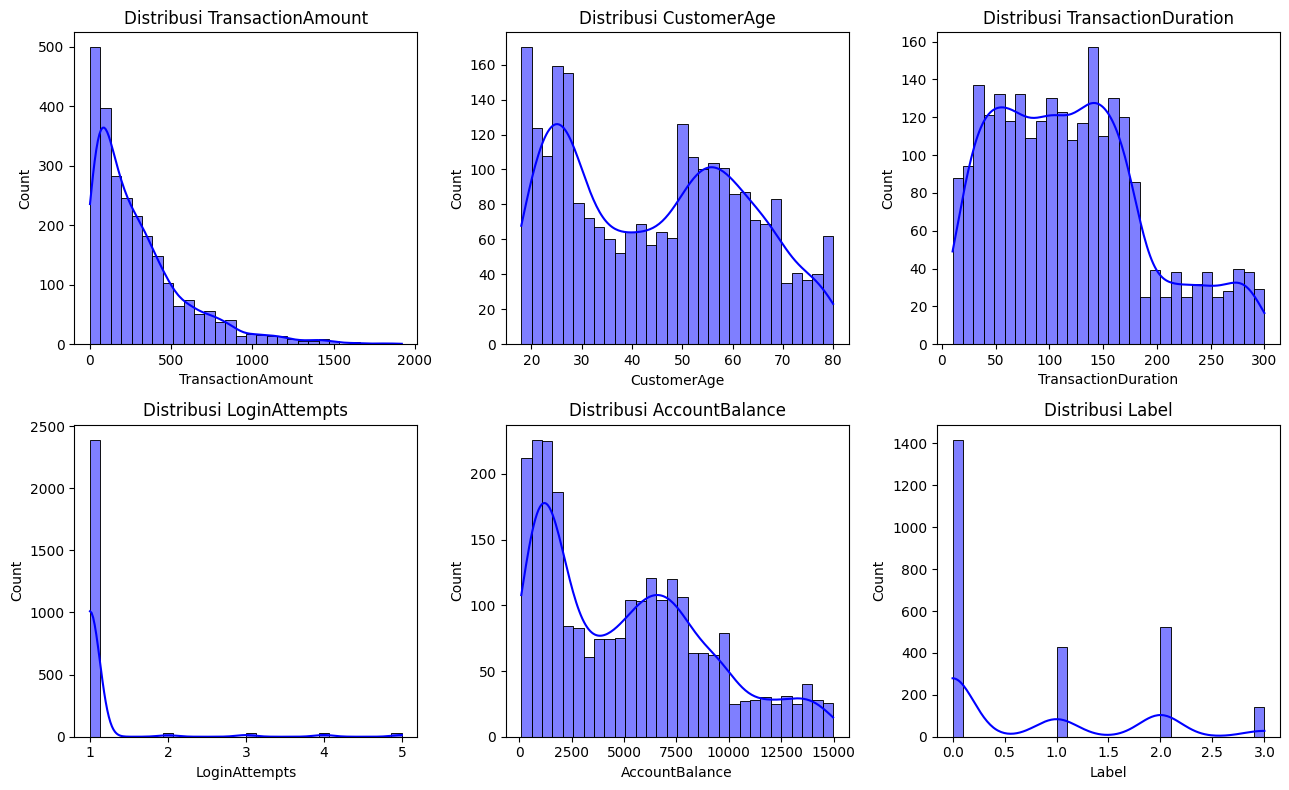

In [384]:
num_features = df.select_dtypes(include=[np.number])

plt.figure(figsize=(13, 8))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot((len(num_features.columns) // 4) + 1, 3, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')

plt.tight_layout()
plt.show()

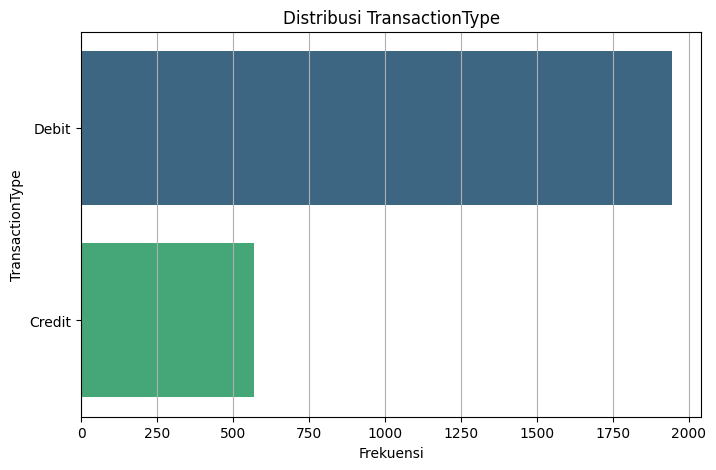

In [385]:
plt.figure(figsize=(8, 5))

# Menampilkan countplot horizontal untuk TransactionType
sns.countplot(y=df['TransactionType'], hue=df['TransactionType'], palette='viridis', legend=False)

plt.title('Distribusi TransactionType')
plt.ylabel('TransactionType')
plt.xlabel('Frekuensi')
plt.grid(True, axis='x')
plt.show()

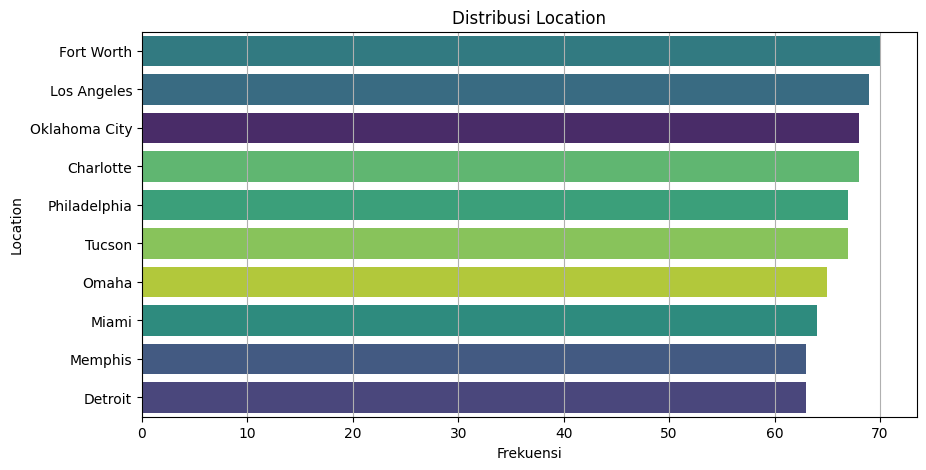

In [386]:
top_10_locations = df['Location'].value_counts().nlargest(10).index
df_top_10 = df[df['Location'].isin(top_10_locations)]

plt.figure(figsize=(10, 5))
sns.countplot(y=df_top_10['Location'], order=top_10_locations, palette='viridis', hue=df_top_10['Location'], legend=False)

plt.title('Distribusi Location')
plt.ylabel('Location')
plt.xlabel('Frekuensi')
plt.grid(True, axis='x')
plt.show()

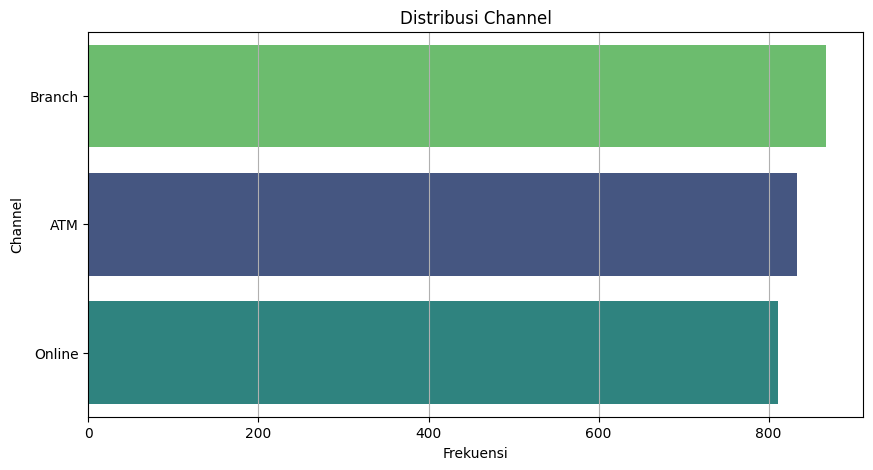

In [387]:
plt.figure(figsize=(10, 5))
channel_order = df['Channel'].value_counts().index

sns.countplot(y=df['Channel'], hue=df['Channel'], order=channel_order, palette='viridis', legend=False)

plt.title('Distribusi Channel')
plt.ylabel('Channel')
plt.xlabel('Frekuensi')
plt.grid(True, axis='x')
plt.show()

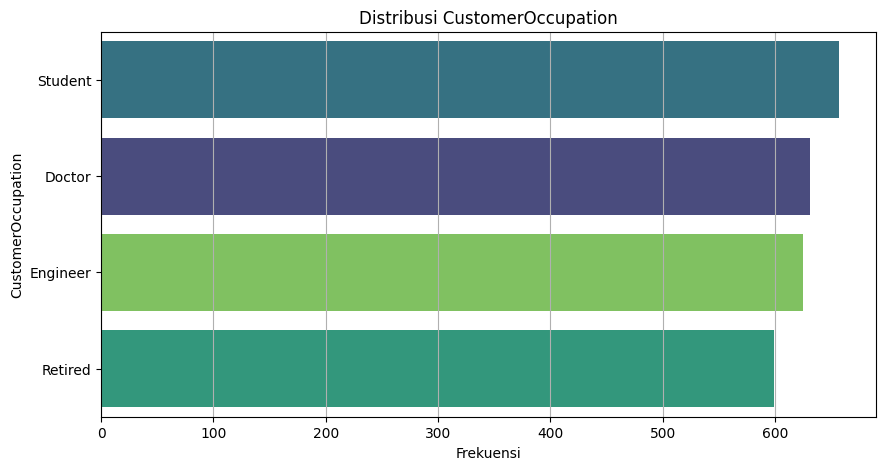

In [388]:
plt.figure(figsize=(10, 5))
occupation_order = df['CustomerOccupation'].value_counts().index

sns.countplot(y=df['CustomerOccupation'], hue=df['CustomerOccupation'], order=occupation_order, palette='viridis', legend=False)

plt.title('Distribusi CustomerOccupation')
plt.ylabel('CustomerOccupation')
plt.xlabel('Frekuensi')
plt.grid(True, axis='x')
plt.show()

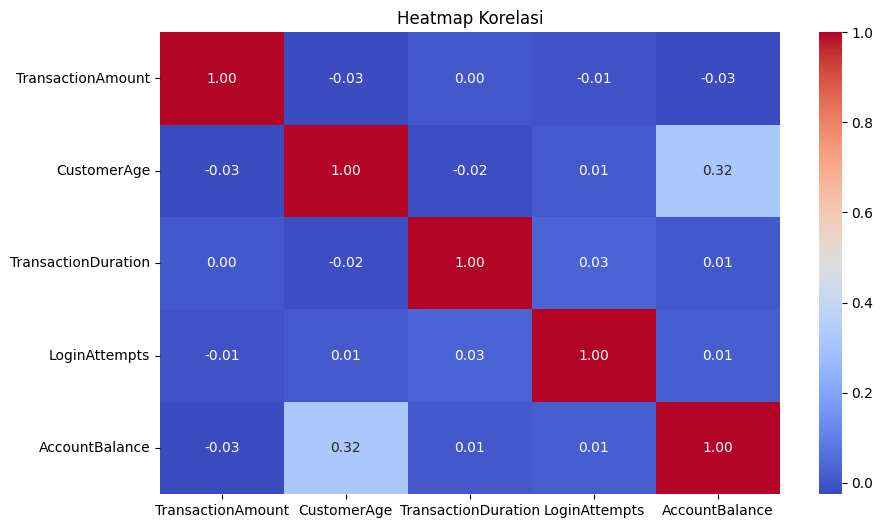

In [389]:
numeric_columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi")
plt.show()

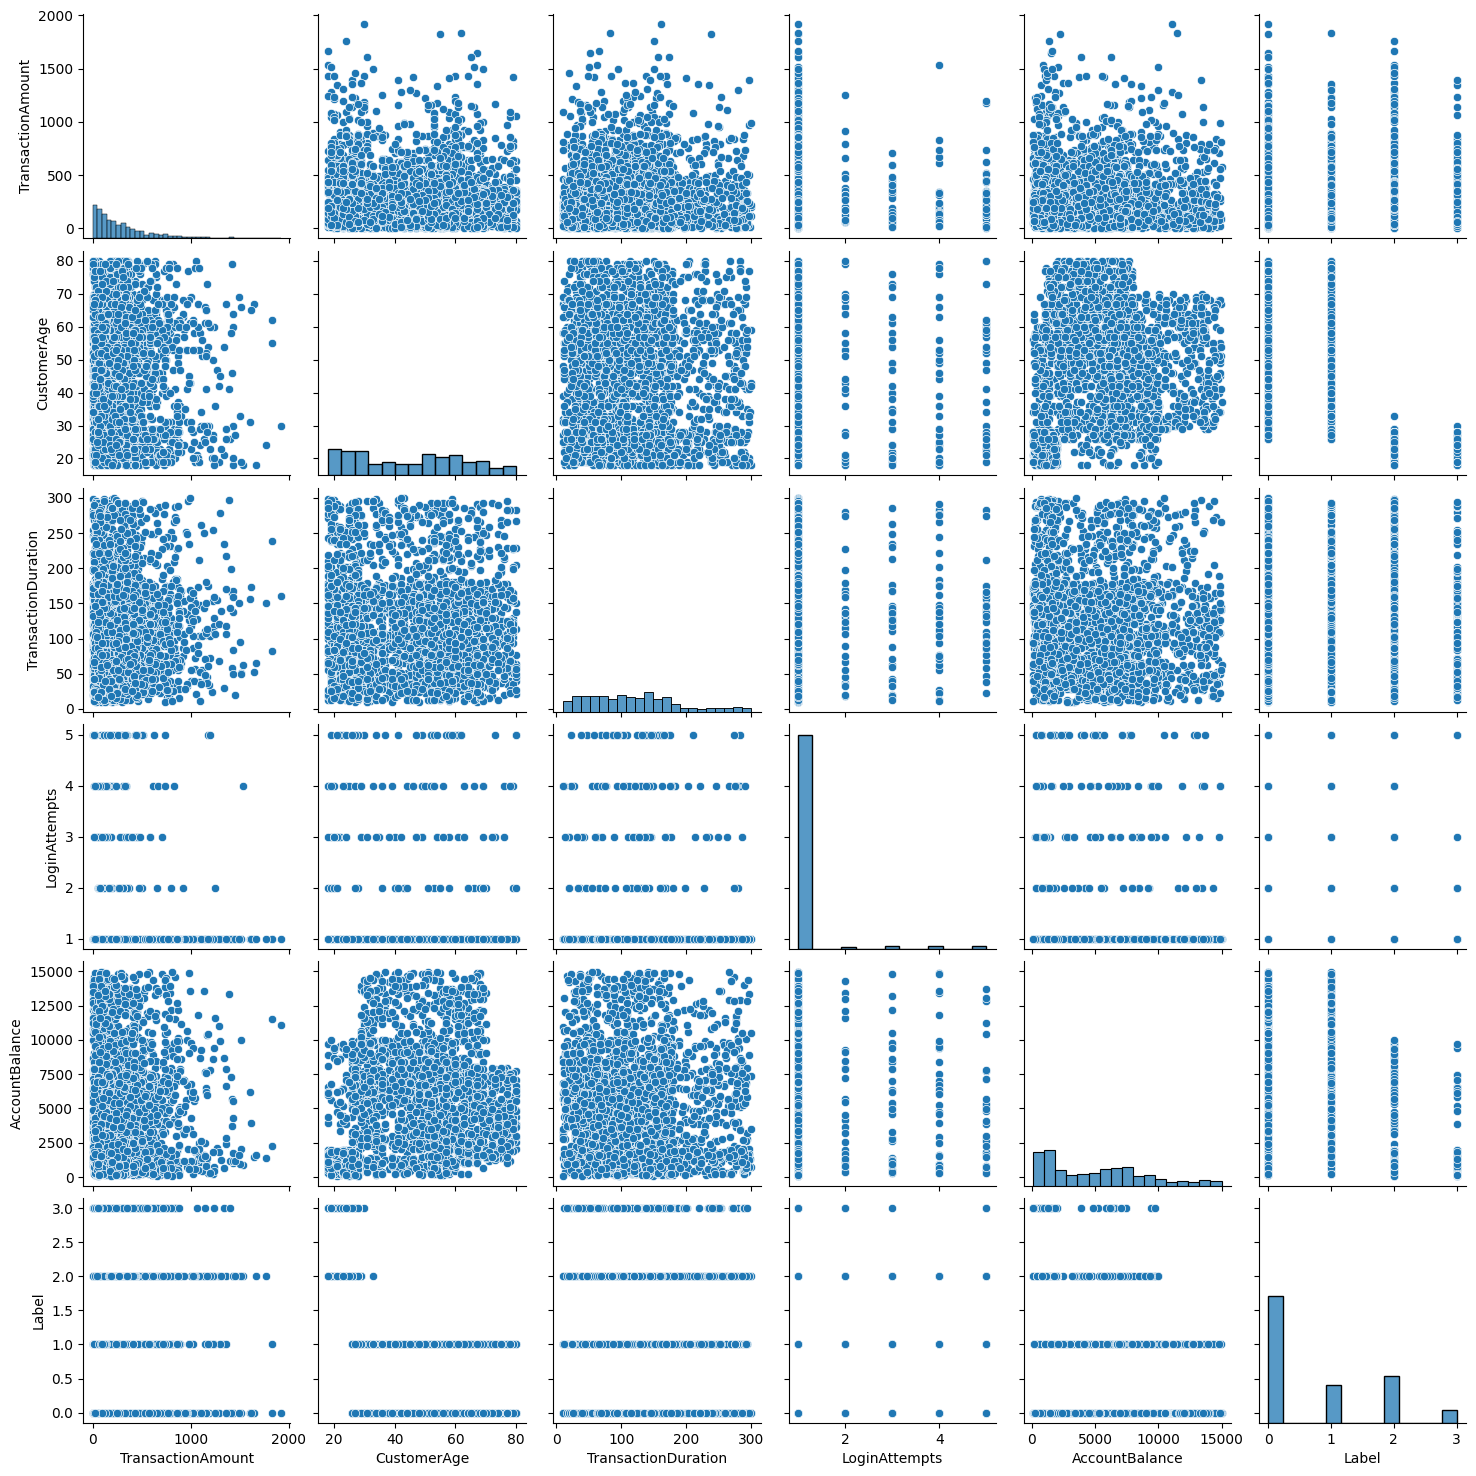

In [390]:
sns.pairplot(num_features)
plt.show()

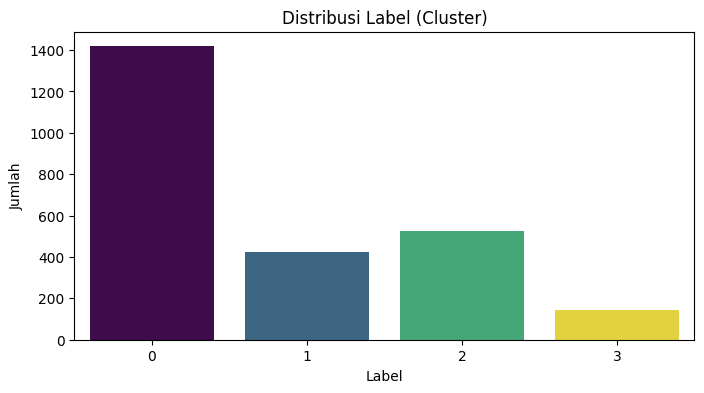

In [391]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Label', data=df, hue='Label', palette='viridis', legend=False)
plt.title('Distribusi Label (Cluster)')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.show()

#### Preprocessing

In [393]:
# Konversi kolom ke format datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

# Ekstraksi fitur waktu
df['TransactionYear'] = df['TransactionDate'].dt.year
df['TransactionMonth'] = df['TransactionDate'].dt.month
df['TransactionDay'] = df['TransactionDate'].dt.day
df['TransactionHour'] = df['TransactionDate'].dt.hour

df['DaysSinceLastTransaction'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.days.abs()

print(df[['TransactionYear', 'TransactionMonth', 'TransactionDay', 'TransactionHour', 'DaysSinceLastTransaction']].head())

   TransactionYear  TransactionMonth  TransactionDay  TransactionHour  \
0             2023                 4              11               16   
1             2023                 6              27               16   
2             2023                 7              10               18   
3             2023                 5               5               16   
4             2023                10              16               17   

   DaysSinceLastTransaction  
0                       573  
1                       496  
2                       483  
3                       549  
4                       385  


In [394]:
df.drop(columns=['TransactionDate', 'PreviousTransactionDate'], inplace=True)

In [395]:
le = LabelEncoder()
df['TransactionType'] = le.fit_transform(df['TransactionType'])

In [396]:
df['Location_Freq'] = df['Location'].map(df['Location'].value_counts() / len(df))
df.drop(columns=['Location'], inplace=True)

In [397]:
df = pd.get_dummies(df, columns=['Channel'], drop_first=True)

In [398]:
df = pd.get_dummies(df, columns=['CustomerOccupation'], drop_first=True)

Lakukan Standarisasi

In [399]:
df.head()

,TransactionAmount,TransactionType,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Label,TransactionYear,TransactionMonth,TransactionDay,TransactionHour,DaysSinceLastTransaction,Location_Freq,Channel_Branch,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,14.09,1,70,81,1,5112.21,0,2023,4,11,16,573,0.023487,False,False,False,False,False
1,376.24,1,68,141,1,13758.91,0,2023,6,27,16,496,0.025080,False,False,False,False,False
2,126.29,1,19,56,1,1122.35,2,2023,7,10,18,483,0.024283,False,True,False,False,True
3,184.50,1,26,25,1,8569.06,2,2023,5,5,16,549,0.023487,False,True,False,False,True
4,13.45,0,26,198,1,7429.40,3,2023,10,16,17,385,0.024283,False,True,False,False,True


In [400]:
# Pisahkan fitur numerik (kecuali 'Label')
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.drop('Label')
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [401]:
df.head()

,TransactionAmount,TransactionType,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Label,TransactionYear,TransactionMonth,TransactionDay,TransactionHour,DaysSinceLastTransaction,Location_Freq,Channel_Branch,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,-0.971275,0.540538,1.423718,-0.552443,-0.206794,-0.000537,0,2023,4,11,16,0.800526,-0.028446,False,False,False,False,False
1,0.269440,0.540538,1.311287,0.305314,-0.206794,2.216472,0,2023,6,27,16,0.076554,0.598373,False,False,False,False,False
2,-0.586882,0.540538,-1.443277,-0.909842,-0.206794,-1.023534,2,2023,7,10,18,-0.045675,0.284963,False,True,False,False,True
3,-0.387456,0.540538,-1.049768,-1.353017,-0.206794,0.885797,2,2023,5,5,16,0.574872,-0.028446,False,True,False,False,True
4,-0.973468,-1.850010,-1.049768,1.120184,-0.206794,0.593589,3,2023,10,16,17,-0.967094,0.284963,False,True,False,False,True


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [402]:
X = df.drop(columns=['Label'])
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(2009, 17), y_train=(2009,)
Test set shape: X_test=(503, 17), y_test=(503,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

In [403]:
# Melatih model dengan data training
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

Model klasifikasi yang digunakan yaitu
- K-Nearest Neighbors (KNN)

KNN adalah algoritma berbasis instance-based learning yang mencari K tetangga terdekat dari data baru dan memprediksi label berdasarkan mayoritas kelas tetangga tersebut
- Decision Tree

Decision Tree membagi data berdasarkan fitur yang paling informatif menggunakan kriteria seperti Gini Impurity atau Entropy (Information Gain).
- Random Forest

Random Forest adalah ensemble learning yang menggunakan banyak Decision Tree
- Naïve Bayes

Berdasarkan Teorema Bayes, yaitu menghitung probabilitas suatu kelas berdasarkan fitur yang diberikan

## **b. Evaluasi Model Klasifikasi**

In [ ]:
# Melakukan prediksi pada data uji
y_pred_knn = knn.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_nb = nb.predict(X_test)

In [ ]:
# Metrik Evaluasi
evaluation_results = {
    "KNN": {
        "Accuracy": accuracy_score(y_test, y_pred_knn),
        "Precision": precision_score(y_test, y_pred_knn, average='weighted', zero_division=1),
        "Recall": recall_score(y_test, y_pred_knn, average='weighted', zero_division=1),
        "F1-Score": f1_score(y_test, y_pred_knn, average='weighted')
    },
    "Decision Tree": {
        "Accuracy": accuracy_score(y_test, y_pred_dt),
        "Precision": precision_score(y_test, y_pred_dt, average='weighted', zero_division=1),
        "Recall": recall_score(y_test, y_pred_dt, average='weighted', zero_division=1),
        "F1-Score": f1_score(y_test, y_pred_dt, average='weighted')
    },
    "Random Forest": {
        "Accuracy": accuracy_score(y_test, y_pred_rf),
        "Precision": precision_score(y_test, y_pred_rf, average='weighted', zero_division=1),
        "Recall": recall_score(y_test, y_pred_rf, average='weighted', zero_division=1),
        "F1-Score": f1_score(y_test, y_pred_rf, average='weighted')
    },
    "Naïve Bayes": {
        "Accuracy": accuracy_score(y_test, y_pred_nb),
        "Precision": precision_score(y_test, y_pred_nb, average='weighted', zero_division=1),
        "Recall": recall_score(y_test, y_pred_nb, average='weighted', zero_division=1),
        "F1-Score": f1_score(y_test, y_pred_nb, average='weighted')
    }
}

In [ ]:
# Menampilkan hasil evaluasi
print("Model Performance Evaluation")
print("-" * 65)
print(f"{'Model':<15} | {'Accuracy':<9} | {'Precision':<9} | {'Recall':<9} | {'F1-Score':<9}")
print("-" * 65)
for model_name, metrics in evaluation_results.items():
    print(f"{model_name:<15} | {metrics['Accuracy']:.1%}     | {metrics['Precision']:.1%}     | {metrics['Recall']:.1%}     | {metrics['F1-Score']:.1%}")
print("-" * 65)

Model Performance Evaluation
-----------------------------------------------------------------
Model           | Accuracy  | Precision | Recall    | F1-Score 
-----------------------------------------------------------------
KNN             | 92.4%     | 92.3%     | 92.4%     | 92.2%
Decision Tree   | 99.8%     | 99.8%     | 99.8%     | 99.8%
Random Forest   | 99.8%     | 99.8%     | 99.8%     | 99.8%
Naïve Bayes     | 99.8%     | 99.8%     | 99.8%     | 99.8%
-----------------------------------------------------------------


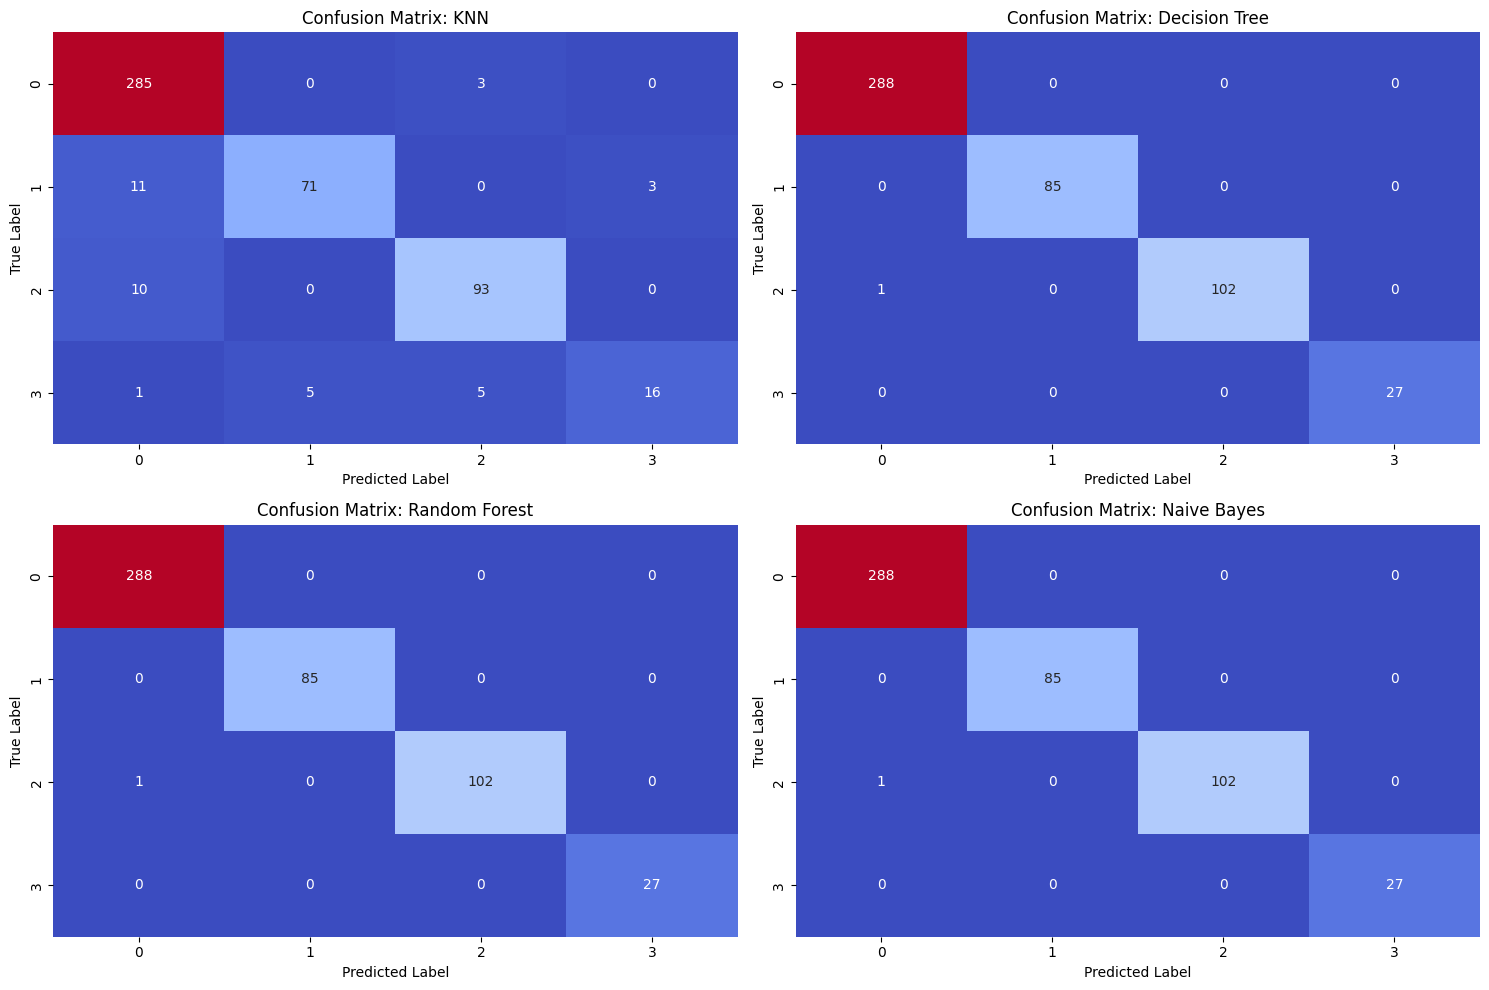

In [ ]:
# Confusion Matrix
model_names = ["KNN", "Decision Tree", "Random Forest", "Naive Bayes"]
models = [knn, dt, rf, nb]
predictions = [y_pred_knn, y_pred_dt, y_pred_rf, y_pred_nb]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, (name, model, y_pred) in enumerate(zip(model_names, models, predictions)):
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=False, ax=axes[i])
    axes[i].set_title(f"Confusion Matrix: {name}")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Evaluasi:
- KNN menunjukkan performa yang cukup baik dengan akurasi 92.4%. Nilai precision, recall, dan F1-score yang hampir seimbang menandakan bahwa model tidak terlalu bias terhadap kelas tertentu.
- Decision Tree mencapai hampir 100% akurasi, yang kemungkinan besar merupakan tanda overfitting. Model mungkin terlalu menyesuaikan dengan data latih dan kehilangan kemampuan generalisasi pada data baru.
- Random Forest juga menunjukkan hasil yang sangat tinggi (99.8%), yang kemungkinan besar menunjukkan overfitting. Meskipun ensemble learning seperti RF biasanya lebih tahan terhadap overfitting dibanding Decision Tree tunggal, skor setinggi ini tetap mencurigakan.
-Hasil yang terlalu tinggi untuk Naïve Bayes juga tidak biasa. Naïve Bayes biasanya tidak mencapai akurasi mendekati 100% kecuali jika ada fitur yang sangat terkait langsung dengan target.

## **c. Tuning Model Klasifikasi (Optional)**

In [408]:
# Hyperparameter Tuning untuk KNN
param_knn = {
    'n_neighbors': range(1, 20),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']}

knn = KNeighborsClassifier()
knn_search = RandomizedSearchCV(knn, param_knn, cv=5, n_iter=10, scoring='accuracy', random_state=42)
knn_search.fit(X_train, y_train)
knn_best = knn_search.best_estimator_

In [409]:
# Hyperparameter Tuning untuk Decision Tree
param_dt = {
    'max_depth': range(1, 20),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 10),
    'criterion': ['gini', 'entropy']
}
dt = DecisionTreeClassifier(random_state=42)
dt_search = RandomizedSearchCV(dt, param_dt, cv=5, n_iter=10, scoring='accuracy', random_state=42)
dt_search.fit(X_train, y_train)
dt_best = dt_search.best_estimator_

In [410]:
# Hyperparameter Tuning untuk Random Forest
param_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': range(1, 20),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 10),
    'criterion': ['gini', 'entropy']
}
rf = RandomForestClassifier(random_state=42)
rf_search = RandomizedSearchCV(rf, param_rf, cv=5, n_iter=10, scoring='accuracy', random_state=42)
rf_search.fit(X_train, y_train)
rf_best = rf_search.best_estimator_

In [411]:
# Hyperparameter Tuning untuk Naïve Bayes
param_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
}
nb = GaussianNB()
nb_search = RandomizedSearchCV(nb, param_nb, cv=5, n_iter=10, scoring='accuracy', random_state=42)
nb_search.fit(X_train, y_train)
nb_best = nb_search.best_estimator_

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

In [412]:
# Menampilkan Hyperparameter Terbaik
print("Best Hyperparameters:")
print(f"KNN: {knn_search.best_params_}")
print(f"Decision Tree: {dt_search.best_params_}")
print(f"Random Forest: {rf_search.best_params_}")
print(f"Naïve Bayes: {nb_search.best_params_}")

Best Hyperparameters:
KNN: {'weights': 'distance', 'n_neighbors': 8, 'metric': 'manhattan'}
Decision Tree: {'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 12, 'criterion': 'entropy'}
Random Forest: {'n_estimators': 100, 'min_samples_split': 9, 'min_samples_leaf': 6, 'max_depth': 15, 'criterion': 'entropy'}
Naïve Bayes: {'var_smoothing': 1e-09}


In [413]:
# Evaluasi model
models = {
    "KNN": knn_best,
    "Decision Tree": dt_best,
    "Random Forest": rf_best,
    "Naïve Bayes": nb_best
}

print("="*70)
print("Model Performance Evaluation Setelah Tuning ".center(70))
print("="*70)
print(f"{'Model':<15} | {'Accuracy':<9} | {'Precision':<9} | {'Recall':<9} | {'F1-Score':<9}")
print("-"*70)

for name, model in models.items():
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

    print(f"{name:<15} | {acc:.2%}    | {prec:.2%}    | {rec:.2%}    | {f1:.2%}")

print("-"*70)


             Model Performance Evaluation Setelah Tuning              
Model           | Accuracy  | Precision | Recall    | F1-Score 
----------------------------------------------------------------------
KNN             | 93.44%    | 93.59%    | 93.44%    | 93.06%
Decision Tree   | 99.80%    | 99.80%    | 99.80%    | 99.80%
Random Forest   | 99.80%    | 99.80%    | 99.80%    | 99.80%
Naïve Bayes     | 99.80%    | 99.80%    | 99.80%    | 99.80%
----------------------------------------------------------------------


In [414]:
# Menampilkan classification report untuk setiap model
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n Classification Report - {name}\n")
    print(classification_report(y_test, y_pred, zero_division=1))
    print("="*70)


 Classification Report - KNN

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       288
           1       0.99      0.78      0.87        85
           2       0.90      0.98      0.94       103
           3       0.89      0.59      0.71        27

    accuracy                           0.93       503
   macro avg       0.93      0.84      0.87       503
weighted avg       0.94      0.93      0.93       503


 Classification Report - Decision Tree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       288
           1       1.00      1.00      1.00        85
           2       1.00      0.99      1.00       103
           3       1.00      1.00      1.00        27

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503


 Classification Report - Random Forest

              pre

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

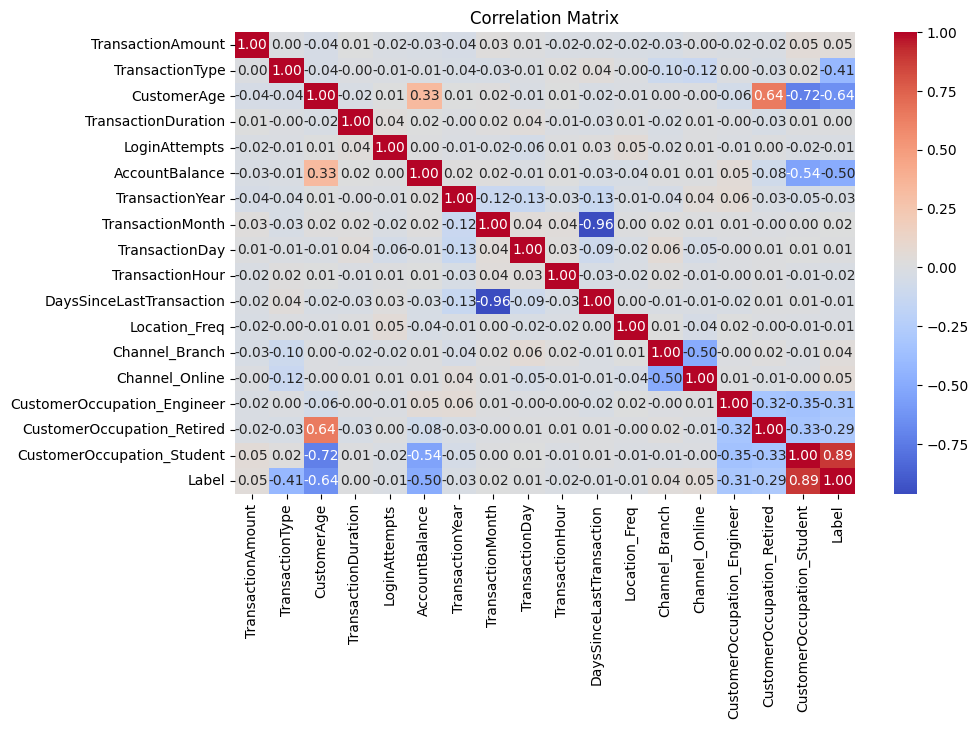

In [415]:
df_train = pd.concat([X_train, y_train], axis=1)
correlation_matrix = df_train.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Berdasarkan heatmap korelasi diatas menunjukan bahwa CustomerOccupation_Student memiliki korelasi yang terlalu tinggi dengan label sehingga model cenderung untuk menghafal berdasarkan fitur tersebut, sehingga berisiko mengalami overfitting atau data leakage.

1. Hasil Evaluasi Setelah Tuning<br>
Model KNN mengalami sedikit peningkatan performa dari 92.4% menjadi 93.0%.
Decision Tree, Random Forest, dan Naïve Bayes mencapai 100% akurasi, yang semakin mengindikasikan kemungkinan overfitting atau data leakage.
2. Identifikasi Kelemahan Model<br>
- KNN <br>
Recall kelas 3 hanya 59%, yang berarti model masih kesulitan dalam mendeteksi kelas ini dengan baik.
Precision dan recall cukup baik untuk kelas lainnya, tetapi f1-score untuk kelas 3 masih rendah.
Kemungkinan penyebab:
Imbalance dataset, kelas 3 memiliki jumlah sampel yang jauh lebih sedikit dibanding kelas lainnya.


- Decision Tree, Random Forest, dan Naïve Bayes <br>
Akurasi 100% menandakan overfitting atau kemungkinan adanya data leakage.
Semua metrik precision, recall, dan f1-score mencapai 1.00, yang tidak realistis dalam kasus dunia nyata.
Kemungkinan penyebab:
Ada fitur dalam dataset yang langsung mengandung informasi target (seperti yang dijelaskan diatas).
Model terlalu kompleks sehingga mampu menghafal data tanpa benar-benar belajar pola yang general.

3. Rekomendasi Tindakan Lanjutan

🔹 KNN:
- Lakukan oversampling atau undersampling pada kelas minoritas (misalnya menggunakan SMOTE).
- Coba feature selection untuk melihat apakah ada fitur yang bisa membantu meningkatkan recall kelas 3.
- Tuning lebih lanjut pada hyperparameter seperti n_neighbors, weights, dan metric.

🔹 Decision Tree, Random Forest, dan Naïve Bayes:
- kemungkinan data leakage dengan mengecek korelasi antara fitur dan target sebelum melatih model.
- Lakukan feature importance analysis pada Random Forest untuk melihat fitur mana yang paling berpengaruh terhadap prediksi. Jika ada fitur dengan korelasi sangat tinggi dengan target, hapus dan latih ulang model.
- Tambahkan regularisasi pada Decision Tree (max_depth, min_samples_split) dan Random Forest (n_estimators, max_depth).
- Gunakan cross-validation untuk memastikan model tidak hanya menghafal data latih.

- Tambahan-> Jika dataset terlalu kecil, pertimbangkan untuk mengumpulkan lebih banyak data agar model dapat belajar lebih baik.

#### Kesimpulan
Berdasarkan percobaan diatas model yang paling optimal(tidak underfit & overfit) dan stabil adalah KNN